<a href="https://colab.research.google.com/github/tigasadrian/tugas_DTI/blob/master/Multiple_Linear_Regression_for_Pie_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MULTIPLE LINEAR REGRESSION FOR PIE SALES ANALYSIS**
Tigas Adrian Wahyuindrajati

DS0127

Assignment of Telkom Digital Talent Incubator 2020

Goal:

To analyze how 2 independent variables (Price and Advertising) affect the dependant variable, which is Pie Sales.



In [4]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7,7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [50]:
# Import Dataset
df_pie_sales = pd.read_csv ('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_pie_sales

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


Note: pie_sales stated in units per week, price stated in \$ , advertising stated in $100's





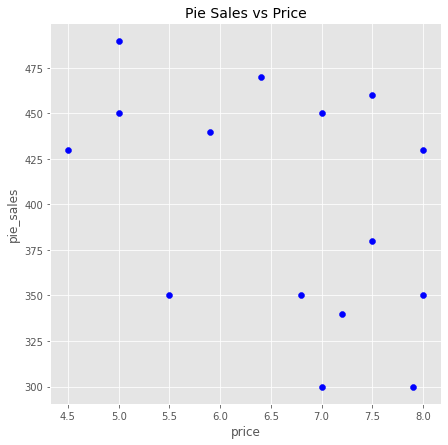

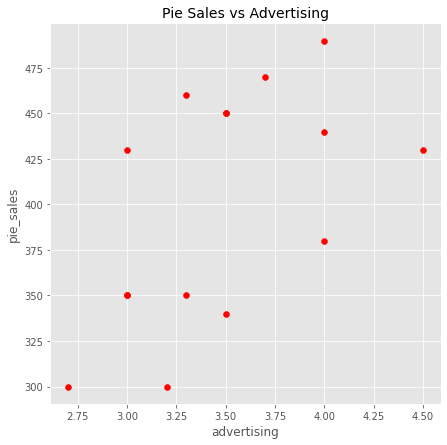

In [44]:
# Visualize the data using scatterplot

# Visualize the relationship of price and pie sales
plt.scatter(df_pie_sales['price'], df_pie_sales['pie_sales'], color='blue')
plt.title('Pie Sales vs Price', fontsize=14)
plt.xlabel('price', fontsize=12)
plt.ylabel('pie_sales', fontsize=12)
plt.grid(True)
plt.show()

# Visualize the relationship of advertising and pie sales
plt.scatter(df_pie_sales['advertising'], df_pie_sales['pie_sales'], color='red')
plt.title('Pie Sales vs Advertising', fontsize=14)
plt.xlabel('advertising', fontsize=12)
plt.ylabel('pie_sales', fontsize=12)
plt.grid(True)
plt.show()

## **Regression using sklearn**

In [39]:
X = df_pie_sales[['price','advertising']] # there are 2 independent variables
Y = df_pie_sales['pie_sales']

In [40]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [306.52619328]
Coefficients: 
 [[-24.97508952  74.13095749]]


In [46]:
# prediction with sklearn
projected_price = 4.5 # the value is adjustable
projected_advertising = 2.7 # the value is adjustable
print('Projected Pie Sales: \n', regr.predict([[projected_price, projected_advertising]]))

Projected Pie Sales: 
 [[394.29187567]]


## **Regression using Statsmodels**

In [47]:
X = sm.add_constant(X) # adding a constant

In [48]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        03:30:59   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      